#  LINEAR REGRESSION ON HOUSING PRICES 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C://Users//jiten//Downloads//Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
print(f"The housing dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The housing dataset has 545 rows and 13 columns.


In [7]:
for col in df:
    null_values = df[col].isnull().sum()
    print(f"{col}: {null_values}%")

price: 0%
area: 0%
bedrooms: 0%
bathrooms: 0%
stories: 0%
mainroad: 0%
guestroom: 0%
basement: 0%
hotwaterheating: 0%
airconditioning: 0%
parking: 0%
prefarea: 0%
furnishingstatus: 0%


In [8]:
duplicates = df.duplicated().sum()

In [9]:
print(f"Their are {duplicates} duplicates in the dataset.")

Their are 0 duplicates in the dataset.


C:\Users\senap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

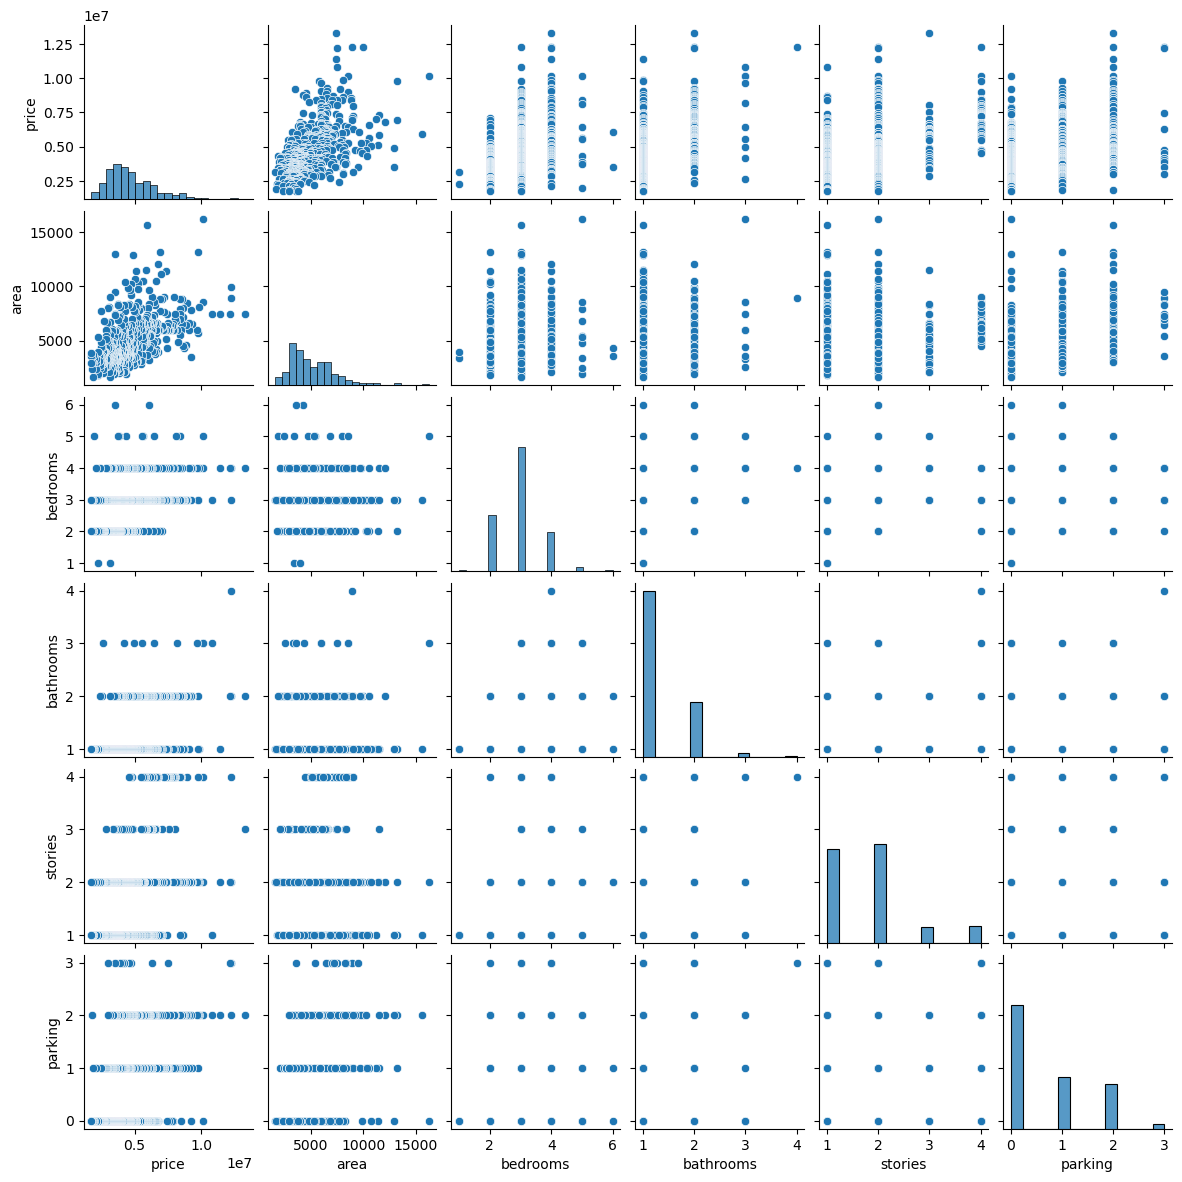

In [10]:
plt.figure(figsize=(12,6))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

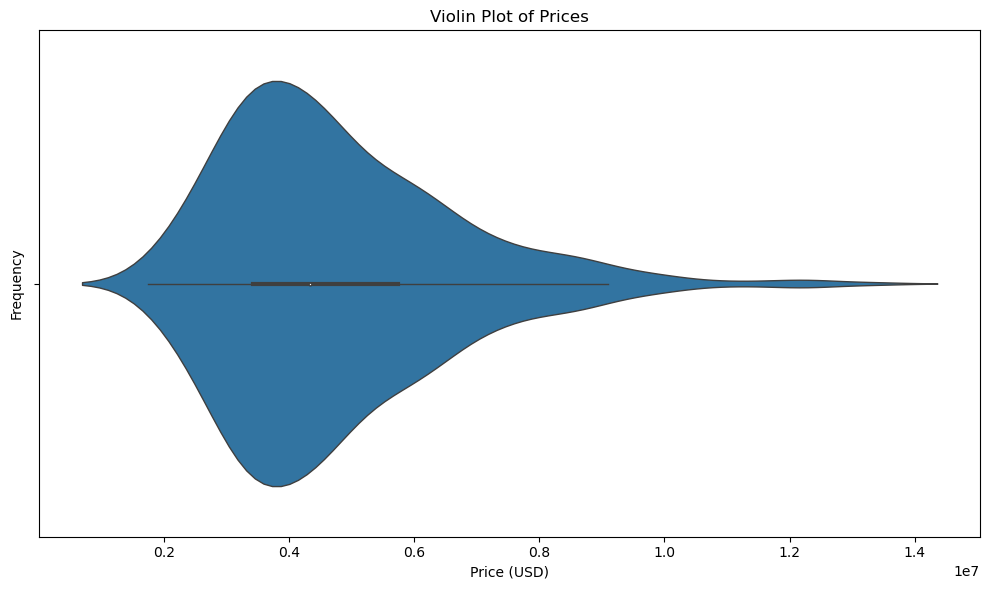

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x=df["price"], linewidth=1, linecolor="k")
plt.title("Violin Plot of Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
categorical_future_mask = df.dtypes==object
categorical_cols = df.columns[categorical_future_mask].tolist()
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

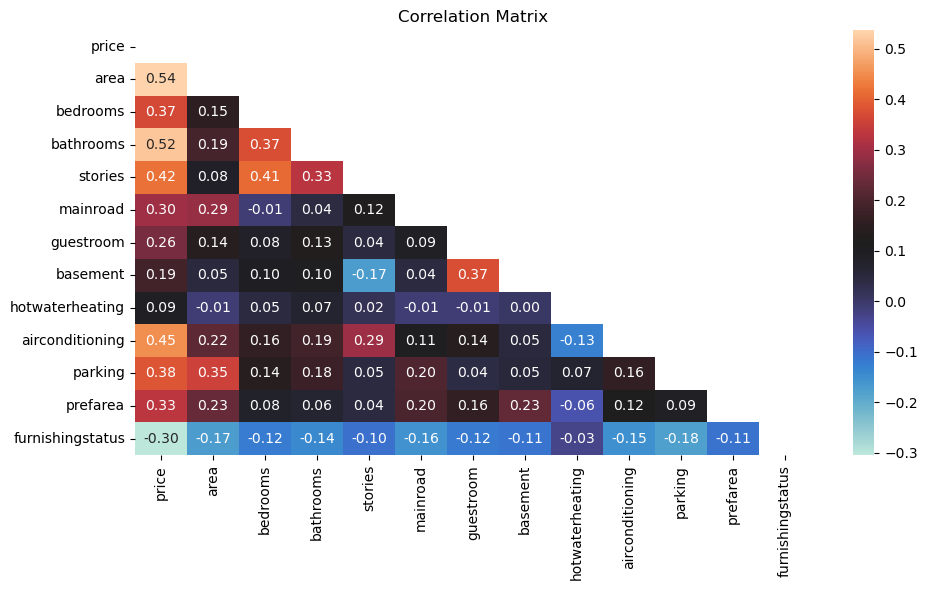

In [13]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

model builing

In [14]:
X = df["area"].values.reshape(-1,1)
y = df["price"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale  = sc.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred = lr.predict(X_test_scale)
print(f"Model Score: {round(lr.score(X_test_scale, y_test) * 100, 2)}%")

Model Score: 34.58%


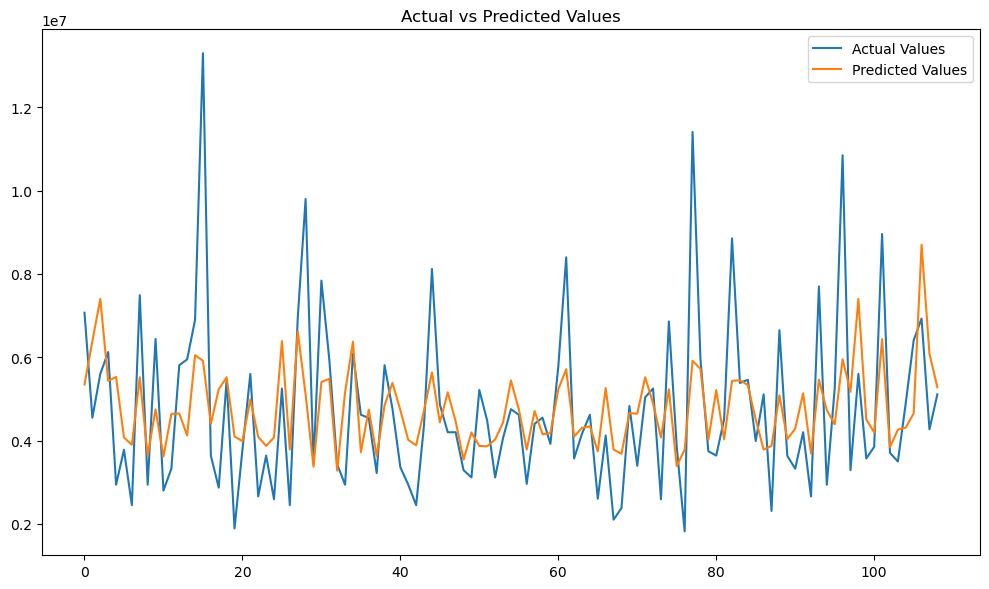

In [16]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

Model Score 61.97%


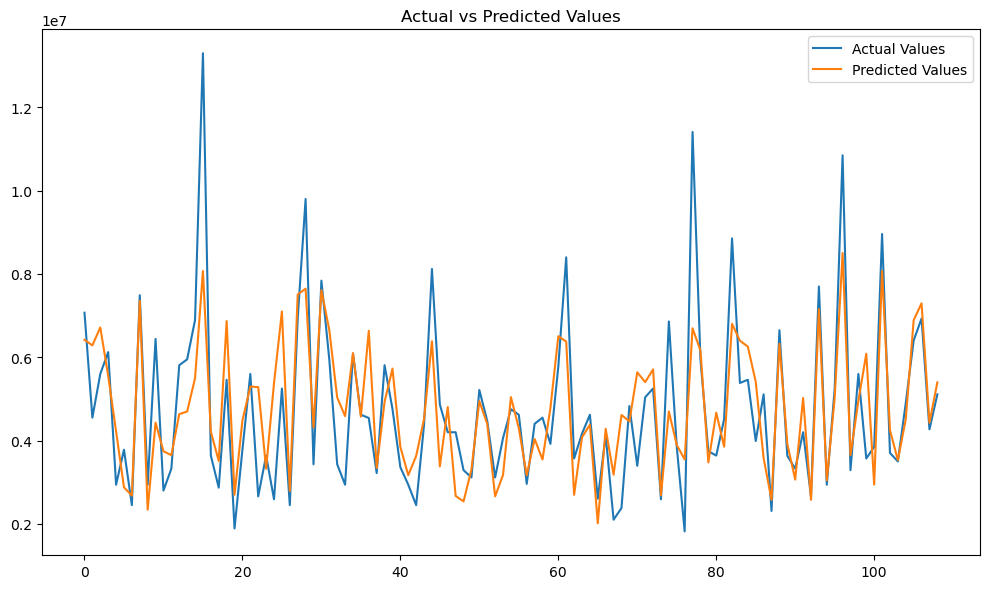

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
def outliers(df, col="price"):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
        # Returning ls
    return ls.tolist()
outlier_list = outliers(df)


In [21]:
df.drop(outlier_list, inplace=True) 
print(f"The new shape of the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The new shape of the dataset has 530 rows and 13 columns


In [22]:
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

In [23]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

Model Score 61.97%


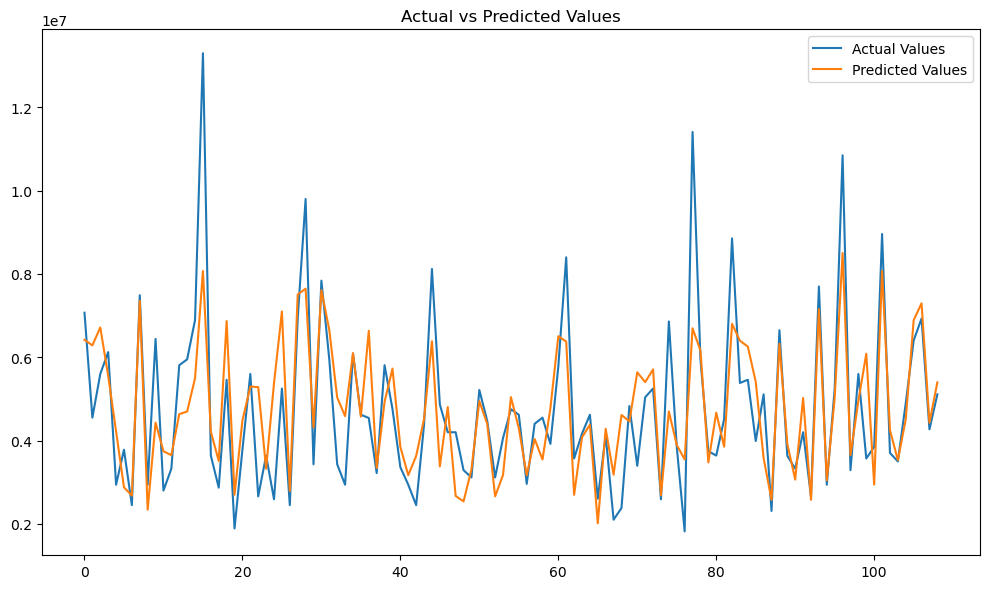

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()